## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""
    建立你的神經網路
"""

from keras.layers import Dropout

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128], drp_ratio = 0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units,
                                   activation='relu',
                                   name = 'hidden_layer' + str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units = n_units,
                                   activation='relu',
                                   name = 'hidden_layer' + str(i+1))(x)
            x = Dropout(drp_ratio)(x)            
    
    out = keras.layers.Dense(units = output_units,
                             activation='softmax',
                             name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], output = [out])
        

    return model

In [13]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.5, 0.25, 0.1]

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout in Dropout_EXP:
    model = build_mlp(input_shape = x_train.shape[1:] , drp_ratio = dropout)
    model.summary()

    optimizer = keras.optimizers.Adam(lr = LEARNING_RATE )

    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data = (x_test, y_test),
              shuffle = True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'drop_rate_%.2f' % dropout
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 15s 300us/step - loss: 1.9394 - acc: 0.2620 - val_loss: 1.9922 - val_acc: 0.2667
Epoch 50/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.9356 - acc: 0.2628 - val_loss: 1.9873 - val_acc: 0.2679
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
______

50000/50000 [==============================] - 16s 313us/step - loss: 1.4922 - acc: 0.4633 - val_loss: 1.4540 - val_acc: 0.4859
Epoch 48/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.4946 - acc: 0.4641 - val_loss: 1.4654 - val_acc: 0.4833
Epoch 49/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.4969 - acc: 0.4620 - val_loss: 1.4617 - val_acc: 0.4801
Epoch 50/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.4926 - acc: 0.4632 - val_loss: 1.4613 - val_acc: 0.4867
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0

50000/50000 [==============================] - 16s 317us/step - loss: 1.1808 - acc: 0.5743 - val_loss: 1.3449 - val_acc: 0.5253
Epoch 46/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.1702 - acc: 0.5798 - val_loss: 1.3640 - val_acc: 0.5173
Epoch 47/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.1672 - acc: 0.5815 - val_loss: 1.3641 - val_acc: 0.5254
Epoch 48/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.1662 - acc: 0.5797 - val_loss: 1.3316 - val_acc: 0.5320
Epoch 49/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.1671 - acc: 0.5781 - val_loss: 1.3284 - val_acc: 0.5297
Epoch 50/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.1595 - acc: 0.5816 - val_loss: 1.3354 - val_acc: 0.5293


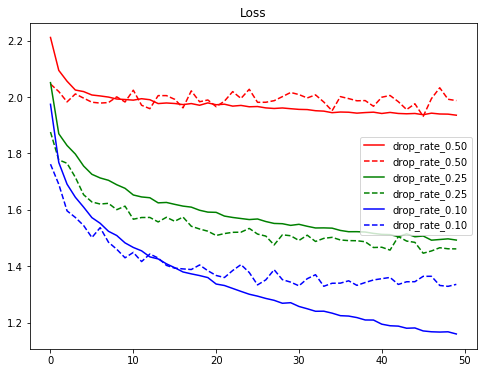

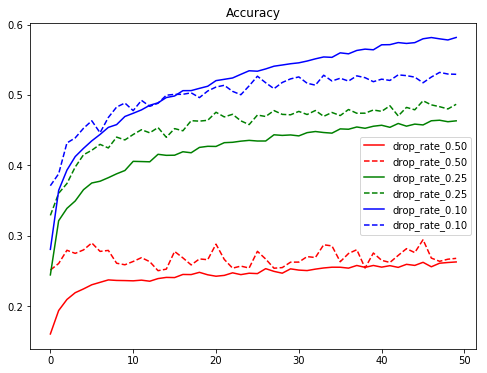

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()